# Project: TMDB Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this notebook, I take a look at the 10,000 movies collected from The Movie Database (TMDb).

Let's start with setting up our notebook:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

First off, let's load our data (quickly sanitizing the column names for easier access) and take a look at our data:

In [2]:
#Import the data set
df = pd.read_csv('tmdb-movies.csv')

#standardize the column names:
df.columns = [c.lower().replace(' ', '_') for c in df]

df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### General Properties and Data Cleaning
#### Removing columns
At first glance, we have a number of columns with duplicated or obviously irrelevant data. So let's reduce the noise a little bit:

**Note:** although we can't do much with the title of each movie, it will help us in deciding on the quality of each datum throughout our analysis with a bit of cross-checking, so I've decided to leave them in

In [3]:
#Drop columns that don't seem very useful to us
columns=[
    'id', 'imdb_id', # we can just use our own index
    'tagline', 'keywords', 'overview', # not useful for simple statistical analysis (text processing/NLP required...)
    'homepage', 
    'release_date', #The release year is of more interest to us
    'budget', 'revenue', # we'll be using the adj values instead
]
df = df.drop(columns=columns)
df.head()

,popularity,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09


Much better, now let's have a look at some of the properties before we continue cleaning the data:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10866 non-null  float64
 1   original_title        10866 non-null  object 
 2   cast                  10790 non-null  object 
 3   director              10822 non-null  object 
 4   runtime               10866 non-null  int64  
 5   genres                10843 non-null  object 
 6   production_companies  9836 non-null   object 
 7   vote_count            10866 non-null  int64  
 8   vote_average          10866 non-null  float64
 9   release_year          10866 non-null  int64  
 10  budget_adj            10866 non-null  float64
 11  revenue_adj           10866 non-null  float64
dtypes: float64(4), int64(3), object(5)
memory usage: 1018.8+ KB


In [5]:
df.duplicated().value_counts()

False    10865
True         1
dtype: int64

By now, we can see a few low hanging fruit still to tidy up. We can drop the single duplicate row in our data:

In [6]:
df = df.drop_duplicates()

### What next? Brainstorming a few questions

We see from our call to `head()` above that many of our rows are multi-dimensional; i.e., they contain several cast, genres and production companies. These fields also contain potential answers to some of the more interesting questions about our data, for example: 
 - How much of an influence do certain actors have on movie popularity? 
 - Are some production companies more efficient (in terms of profit) than others at producing good movies? 
 - Is a certain genre of movie more popular on average?
 - Have movies become more expensive on average over time? 
 
In order to answer these questions, we'll need to break up the values and create rows for each with a single genre, actor, or production company.

We also see that some movies missing information. There are some without any cast, director, genres or production companies. What does it mean for a film not to have any actors, a production company or associated genre? Let's have a quick look at some of these rows in more detail to understand what's happening:

#### Production companies

In [7]:
df[df['production_companies'].isna()].head()

,popularity,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
228,0.584363,Racing Extinction,Elon Musk|Jane Goodall|Louie Psihoyos|Leilani ...,Louie Psihoyos,90,Adventure|Documentary,NaN,36,7.8,2015,0.0,0.0
259,0.476341,Crown for Christmas,Danica McKellar|Rupert Penry-Jones|Ellie Botte...,Alex Zamm,84,TV Movie,NaN,10,7.6,2015,0.0,0.0
295,0.417191,12 Gifts of Christmas,Katrina Law|Donna Mills|Aaron O'Connell|Melani...,Peter Sullivan,84,Family|TV Movie,NaN,12,6.3,2015,0.0,0.0
298,0.370258,The Girl in the Photographs,Kal Penn|Claudia Lee|Kenny Wormald|Toby Heming...,Nick Simon,95,Crime|Horror|Thriller,NaN,10,4.7,2015,0.0,0.0
328,0.367617,Advantageous,Jacqueline Kim|James Urbaniak|Freya Adams|Ken ...,Jennifer Phang,92,Science Fiction|Drama|Family,NaN,29,6.4,2015,0.0,0.0


Doing a quick internet search for some of these titles reveals that these films are often self-produced or produced by individuals, not companies. This makes sense given the name of the column. That could be an interesting feature of the data to analyse. 

#### Cast:

In [8]:
df[df['cast'].isna()].head()

,popularity,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
371,0.422901,Sanjay's Super Team,NaN,Sanjay Patel,7,Animation,Pixar Animation Studios,47,6.9,2015,0.0,0.0
441,0.220751,Winter on Fire: Ukraine's Fight for Freedom,NaN,Evgeny Afineevsky,98,Documentary,Passion Pictures|Campbell Grobman Films|Afinee...,37,8.2,2015,0.0,0.0
465,0.201696,Bitter Lake,NaN,Adam Curtis,135,Documentary,BBC,19,7.8,2015,0.0,0.0
536,0.122543,A Faster Horse,NaN,David Gelb,90,Documentary,NaN,12,8.0,2015,0.0,0.0
538,0.114264,The Mask You Live In,NaN,Jennifer Siebel Newsom,88,Documentary,NaN,11,8.9,2015,0.0,0.0


Looking further into these films, we see that they're mostly documentaries or animated films without any sense of fixed cast per se. So it also makes sense to leave these rows in the data set. 

#### Genres:


In [9]:
df[df['genres'].isna()].head()

,popularity,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
424,0.244648,Belli di papÃ,Diego Abatantuono|Matilde Gioli|Andrea Pisani|...,Guido Chiesa,100,NaN,NaN,21,6.1,2015,0.0,0.0
620,0.129696,All Hallows' Eve 2,NaN,Antonio Padovan|Bryan Norton|Marc Roussel|Ryan...,90,NaN,Ruthless Pictures|Hollywood Shorts,13,5.0,2015,0.0,0.0
997,0.330431,Star Wars Rebels: Spark of Rebellion,Freddie Prinze Jr.|Vanessa Marshall|Steve Blum...,Steward Lee|Steven G. Lee,44,NaN,NaN,13,6.8,2014,0.0,0.0
1712,0.302095,Prayers for Bobby,Ryan Kelley|Sigourney Weaver|Henry Czerny|Dan ...,Russell Mulcahy,88,NaN,Daniel Sladek Entertainment,57,7.4,2009,0.0,0.0
1897,0.020701,Jonas Brothers: The Concert Experience,Nick Jonas|Joe Jonas|Kevin Jonas|John Lloyd Ta...,Bruce Hendricks,76,NaN,NaN,11,7.0,2009,0.0,0.0


It seems as though the rows without a listed genre are just incomplete (and uninteresting). Let's drop them:

In [10]:
df = df[df['genres'].notna()]

### Splitting cast, genres and production companies
In order to group our data by genre, actor or production company, we'll need to turn our concatenated strings into individual rows (i.e. ["explode"](https://stackoverflow.com/questions/12680754/split-explode-pandas-dataframe-string-entry-to-separate-rows/40449726#40449726) the rows). Since this will produce a large number of rows, it makes sense to do this as we want to analyse a particular feature of our data. Here, I'll define a function we can use later to make this exploding easier:

In [11]:
def explode(old_column, new_column):
    return df.assign(**{new_column : df[old_column].str.split('|')}).explode(new_column).drop(columns=old_column)

   
explode('cast', 'actor').head()

,popularity,original_title,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,actor
0,32.985763,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,Chris Pratt
0,32.985763,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,Bryce Dallas Howard
0,32.985763,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,Irrfan Khan
0,32.985763,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,Vincent D'Onofrio
0,32.985763,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,Nick Robinson


Okay, now we have something in a more normal form. Just to confirm that we still have our independently produced films and documentaries without actors, I'll check one data point that originally had a null value:

In [12]:
df_actors = explode('cast', 'actor')
df_actors[df_actors['original_title'] == 'Bitter Lake']

,popularity,original_title,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,actor
465,0.201696,Bitter Lake,Adam Curtis,135,Documentary,BBC,19,7.8,2015,0.0,0.0,NaN


And it's still there, with a null actor as expected. Now we can finally move on!

<a id='eda'></a>
## Exploratory Data Analysis

### Have movies become more expensive on average over time?

The most obvious question to ask is related to how the (adjusted) average production cost of a movie (budget) has gone up or down over the 60 years. Let's plot it:

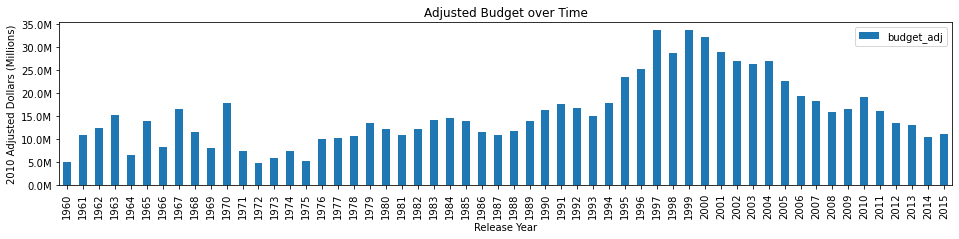

In [13]:
#First, let's creat a price formatter for our dollar values that we can reuse in later:
from matplotlib.ticker import FuncFormatter
price_formatter = FuncFormatter(lambda x, pos: '%1.1fM' % (x * 1e-6))

rel_year = df.groupby('release_year').mean()

ax = rel_year.plot.bar(y=['budget_adj'], figsize=(16, 3))
ax.yaxis.set_major_formatter(price_formatter)
plt.title('Adjusted Budget over Time');
ax.set_ylabel('2010 Adjusted Dollars (Millions)');
ax.set_xlabel('Release Year');

It looks like the answer to the question is: a little bit. The budgets that movies have had on average have gone through different phases, but there seems to be no clear trend up or down since the 1980s. Interesting to note however, is that there was however a brief increase in budgets from 1993 to around 2008. What might have caused this?


## Investigating the budget spike between ~1993 and ~2008
Perhaps this bulge in movie prices was due to the increase use of technology for special effects that, while initially expensive, eventually got cheaper over time. One would then expect that movie genres that are special-effect heavy, like action films, got more expensive in relation to films produced in other genres.

### What movie genres are most expensive to produce?
To investigate this hypothesis, let's first break up our data by genre and find the mean costs for each. For this, we'll need to explode out the genre column into separate rows, then group by each individual genre and find the mean adjusted budget, and plot it for clarity:

**Note:** it is important to keep in mind going forward that these are not mutually exclusive categories. I.e., a film may be both adventure and fantasy, and so the budgets here add up to more than the total budgets of all movies combined. What splitting the data up this way will tell us is if a given genre is correlated with an increasing cost of production in a film. 

In [14]:
df_genres_expl = explode('genres', 'genre')
df_by_genre = df_genres_expl.groupby('genre').mean()['budget_adj'].sort_values(ascending=False)
df_by_genre

genre
Adventure          4.393734e+07
Fantasy            3.742932e+07
Action             3.296011e+07
Science Fiction    2.952429e+07
War                2.893007e+07
Family             2.692389e+07
History            2.655802e+07
Animation          2.529535e+07
Western            2.449744e+07
Crime              2.153351e+07
Thriller           2.068296e+07
Mystery            1.948231e+07
Comedy             1.592031e+07
Romance            1.565922e+07
Drama              1.485353e+07
Music              1.298886e+07
Horror             7.764841e+06
Foreign            2.379151e+06
Documentary        6.232226e+05
TV Movie           2.960215e+05
Name: budget_adj, dtype: float64

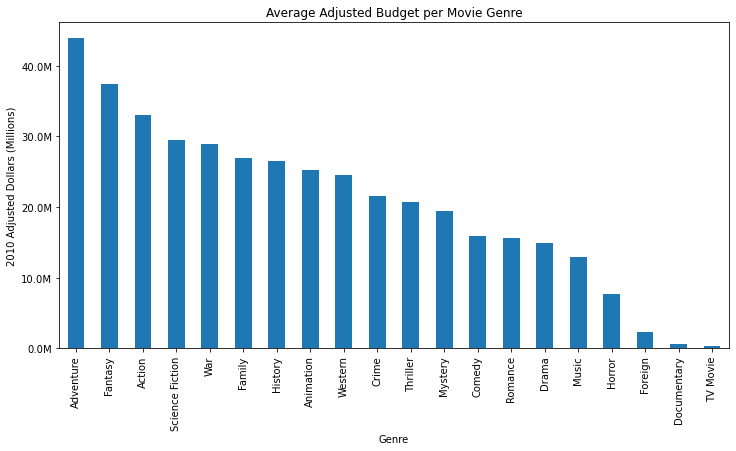

In [15]:
ax = df_by_genre.plot.bar(figsize=(12, 6))
ax.yaxis.set_major_formatter(price_formatter)
plt.title('Average Adjusted Budget per Movie Genre');
ax.set_ylabel('2010 Adjusted Dollars (Millions)');
ax.set_xlabel('Genre');

And indeed, adventure, fantasy and action movies are the most expensive movies to produce. This is good news for our hypothesis, but the bulge might be due to an increase in the proportionate number of adventure, action and fantasy movies produced. To see if that's the case let's answer first the more general question:

### How has the production of different movie genres varied over time?
To answer this, we'll need to group the count of movies by genre for every given year so that we can match it up with our budget-vs-time graph from earler. Again, we'll need our data frame with exploded genre values. It also turns out that the pandas `unstack()` command can help us get from our multi-indexed series to a data frame, pivoted around the genre! 

In [16]:
#I'm just taking the original title column here, since for counts it doesn't matter which column I pick
genre_count_by_year = df_genres_expl.groupby(['release_year', 'genre']).count()['original_title'].unstack()
genre_count_by_year.head()

genre,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
release_year,,,,,,,,,,,,,,,,,,,,
1960,8.0,5.0,NaN,8.0,2.0,NaN,13.0,3.0,2.0,1.0,5.0,7.0,1.0,NaN,6.0,3.0,NaN,6.0,2.0,6.0
1961,7.0,6.0,1.0,10.0,2.0,NaN,16.0,5.0,2.0,1.0,3.0,3.0,2.0,1.0,7.0,4.0,NaN,NaN,2.0,3.0
1962,8.0,7.0,NaN,5.0,3.0,NaN,21.0,2.0,1.0,1.0,4.0,5.0,1.0,4.0,5.0,2.0,NaN,7.0,3.0,3.0
1963,4.0,7.0,1.0,13.0,4.0,NaN,13.0,3.0,2.0,2.0,4.0,9.0,NaN,6.0,8.0,2.0,NaN,10.0,1.0,2.0
1964,5.0,5.0,2.0,16.0,10.0,NaN,20.0,4.0,4.0,1.0,3.0,6.0,5.0,4.0,9.0,4.0,NaN,9.0,3.0,1.0


In [17]:
# Checking that the counts here make sense:

action = df_genres_expl['genre'] == 'Action'
y_1960 = df_genres_expl['release_year'] == 1960
len(df_genres_expl[action & y_1960])


8

A quick sanity check shows that these values seem correct, now to graph them!

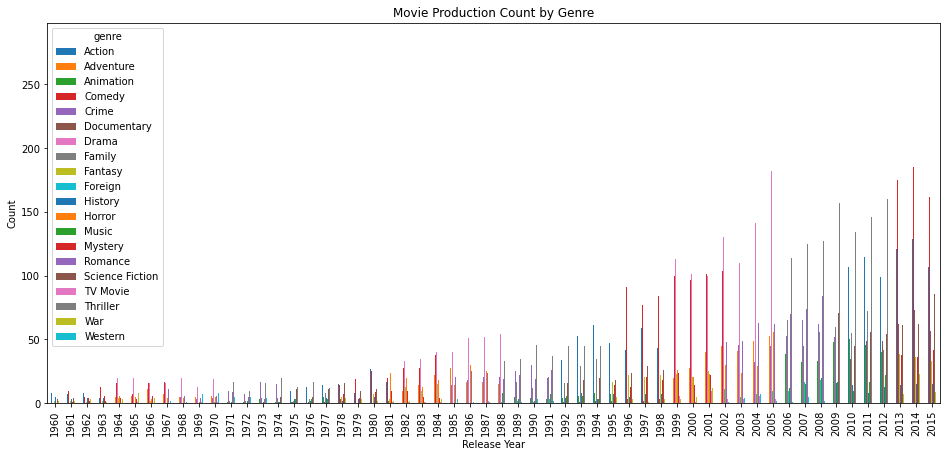

In [18]:
ax = genre_count_by_year.plot.bar(figsize=(16, 7))
plt.title('Movie Production Count by Genre')
ax.set_ylabel('Count')
ax.set_xlabel('Release Year');

Okay, so this is a very noisy graph, but it does show us one interesting thing I forgot to consider: the total number of genre tags has increased from year to year. Either more movies have been produced over time, or more movies were increasingly described as a mixture of different genres (e.g. `"Action|Adventure"`), or a bit of both.


So we'll need to normalize our counts by dividing by the total number of movies released with that genre tag in a given year, by the total movie count for that year. That will give us the proportion of movies for a given year that have been tagged with the given genre.

Just to get an idea, we'll also graph the change in the number of movies produced each year since 1960.


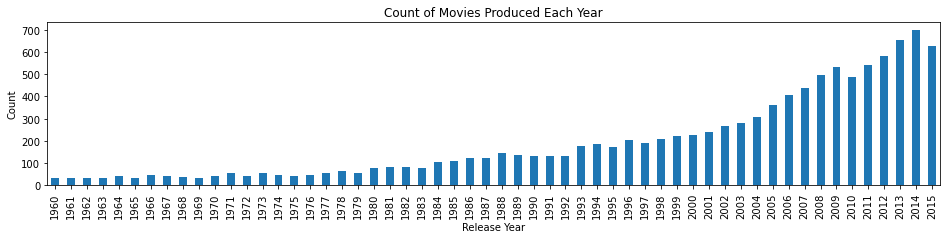

In [19]:
#First, find the total movie counts for each year:
total = df.groupby('release_year').count()['original_title'].rename('movie_count')

#This is also interesting to look at:
ax = total.plot.bar(figsize=(16, 3));
plt.title('Count of Movies Produced Each Year')
ax.set_ylabel('Count')
ax.set_xlabel('Release Year');

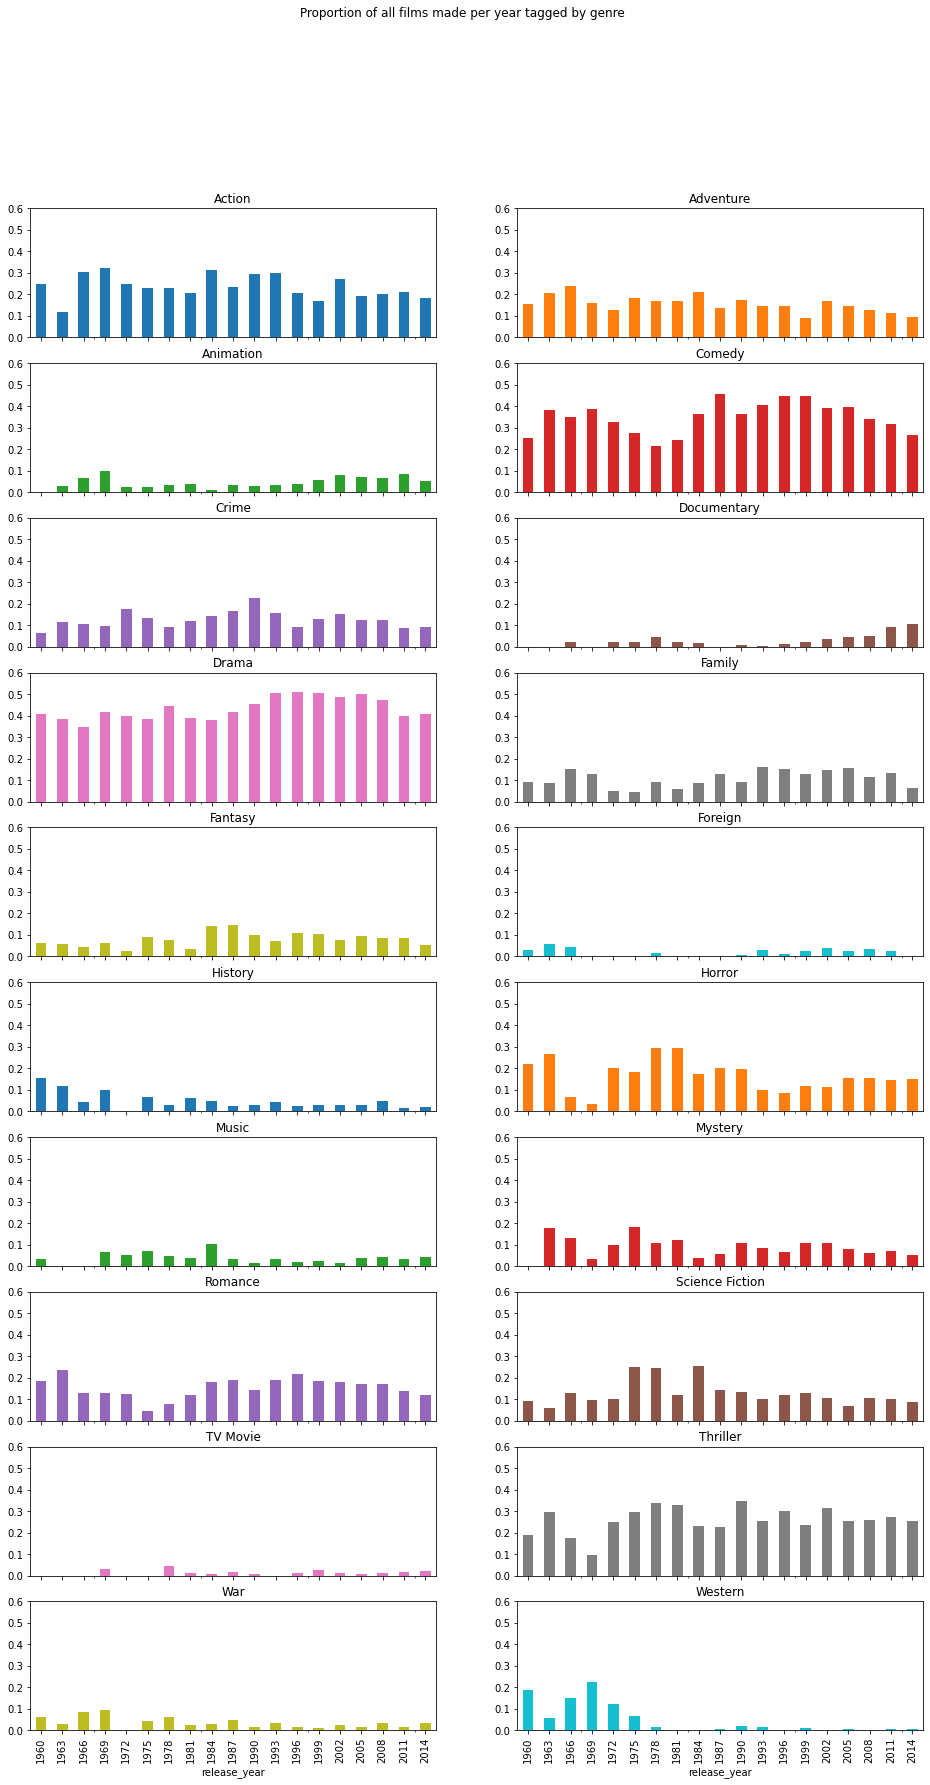

In [20]:
genre_count_by_year_norm = genre_count_by_year.assign(total=total)
genre_count_by_year_norm = genre_count_by_year_norm.loc[:, :].div(genre_count_by_year_norm['total'], axis=0).drop(columns=['total'])
genre_count_by_year_norm = genre_count_by_year_norm.iloc[::3, :]

axes = genre_count_by_year_norm.plot.bar(
    subplots=True, figsize=(16, 28), layout=(10,2),
    ylim=(0, 0.6), legend=False,
    title = "Proportion of all films made per year tagged by genre");

#Note, I cannot figure out where this space under the title is coming from


Now we have an idea of the production rates of various movie genres in a given year. Interestingly, the most expensive genres - the ones we are investigating, have on average actually *decreased* in proportion to the total number of movies made in this time frame. This is promising for our hypothesis that the bulge is due to the increase cost of technology used to produce these films, as we can rule out that proportionaly more of them were produced in this period.

So now let's take a closer look at how the production costs of action, adventure and fantasy films has varied over time

### How have the production costs of adventure, fantasy and action films varied over time?
To answer this question, we'll need to take our data, exploded by genre, and filter for only the action and adventure genre types, then see how the production costs have changed from year to year:

In [21]:
# The genres we want to look at
genres = ['Action', 'Adventure', 'Fantasy']

def cost_series(g):
    #Create a filter for all entries that match our genre
    filt = df_genres_expl['genre'] == g
    #Group them by the release year, calculate the means, get the budget and create a series
    return df_genres_expl[filt].groupby('release_year').mean()['budget_adj'].rename(g)

# combine the series together to get our little target dataframe
combined = pd.concat(list(map(cost_series, genres)), axis=1)
combined.head()

,Action,Adventure,Fantasy
release_year,,,
1960,1.290269e+07,4.055132e+06,2.764863e+06
1961,1.667397e+07,1.215810e+07,0.000000e+00
1962,2.351756e+07,3.202611e+07,9.082646e+02
1963,5.144330e+07,1.820732e+07,3.560090e+06
1964,4.921187e+06,6.022127e+06,1.054540e+07


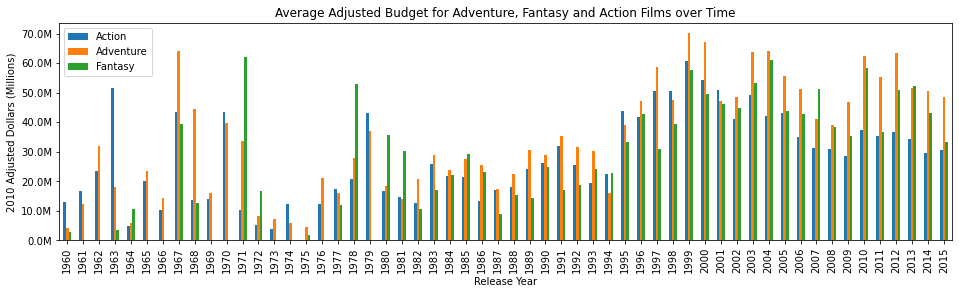

In [22]:
ax = combined.plot.bar(figsize=(16, 4));
ax.yaxis.set_major_formatter(price_formatter)
plt.title('Average Adjusted Budget for Adventure, Fantasy and Action Films over Time');
ax.set_ylabel('2010 Adjusted Dollars (Millions)');
ax.set_xlabel('Release Year');

And indeed, we see a similar shape here as to our total cost fluctuations from the beginning. Even more interestingly we see that action, adventure and fantasy film budgets follow each other quite closely. Let's draw our total budget graph from earlier to make the comparison easier:

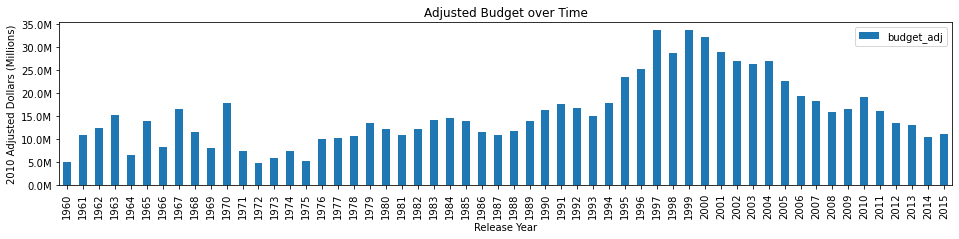

In [23]:
ax = rel_year.plot.bar(y=['budget_adj'], figsize=(16, 3))
ax.yaxis.set_major_formatter(price_formatter)
plt.title('Adjusted Budget over Time');
ax.set_ylabel('2010 Adjusted Dollars (Millions)');
ax.set_xlabel('Release Year');

Interestingly, we actually see that the total average budgets for films detaches from the average budgets of our action, adventure and fantasy genres after 2008, which correlates to the reduction in the proportion of such films being made after 2008. This would not support the hypothesis that some factor in the increase in production costs - such as an increase in the use or sophistication of special-effects technology - then got cheaper, rather the number of these films produced in proportion decreased. 

### Was this increase in cost worth it?
An obvious question here is to ask if the increase in cost of action, adventure and fantasy films was worth the increase in cost in their production (whatever that might have actually been)? To answer that, we'll visually look at the relationship between action, adventure and fantasy film cost (i.e. budget) with popularity of the film:

In [71]:
df.head()

,popularity,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09


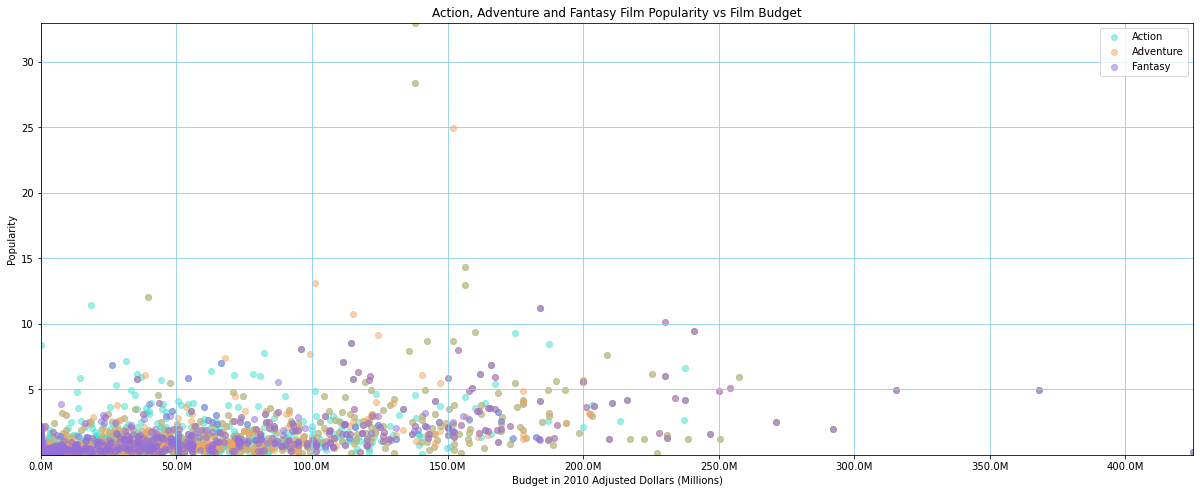

In [75]:
fig = plt.figure(figsize=(16, 6))
axes = fig.add_axes([0, 0, 1, 1])

genres = ['Action', 'Adventure', 'Fantasy']
colors = ['Turquoise', 'SandyBrown', 'MediumPurple']

for i in range(3):
    genre = genres[i]
    #Pick out just the genres we want to examine
    df_sub = df_genres_expl.query('genre == "{}"'.format(genre))
    axes.scatter(x='budget_adj', y='popularity', data=df_sub, color=colors[i], label=genre, alpha=0.5)

axes.legend()
axes.xaxis.set_major_formatter(price_formatter)
axes.set_xlabel('Budget in 2010 Adjusted Dollars (Millions)');
axes.set_ylabel('Popularity');
axes.margins(x=0, y=0)
axes.grid(True, color='SkyBlue')
axes.set_title('Action, Adventure and Fantasy Film Popularity vs Film Budget');

From the graph above, it looks like there would at best be a weak correlation between the cost of a film and it's popularity. It is important to note that, according to the TMBD API, the popularity is a function of the following information:

- Number of votes for the day
- Number of views for the day
- Number of users who marked it as a "favourite" for the day
- Number of users who added it to their "watchlist" for the day
- Release date
- Number of total votes
- Previous days score

Which of course makes it harder to determine what is happening here, but ultimately, if this popularity score is to be trusted, then it seems like movie budget has only a weak effect on the overal popularity of a movie. This might be explained by some form of hedonic adaptation, where as movies become bigger and bigger budget, we adapt to the quality year for year. Testing this hypothesis would mean however, we would ideally break the above graph down into snapshots from year to year.

<a id='conclusions'></a>
## Conclusions

In analysing the production rates and costs (budgets) of different movie genres over time, I've tried to investigate the reasons for the fluctuations in yearly average budgets for all film production over time, narrowing down on the production-cost bulge between 1993 and 2008, hypothesising that something intrinsic to certain film types (say, the technology required for special effects in action films) was a potential cause.

First, we saw that on average, action, adventure and fantasy films were in fact more expensive than other genre types. Then we ruled out that the bulge might have been caused by a radical shift in the types of movies produced in that period. Paradoxically, we actually see a decrease in the number of films produced from the genres with higher-than-average budgets. 

We then drilled down further on the yearly-average budget for our more expensive film genres, noticing that in fact, they also experienced an increase in average adjusted budget for the period between 1993 and 2008. This is not a definitive causal relationship, as other factors that have not been investigated here might have also caused budget to increase in this time period; say by a tendency to hire more or more in-demand actors, or by the increase in the proportion of comedy and drama films in the time period investigated.

Finally, comparing the average budgets of movies after 2008 shows that the second part of the hypothesis, that whatever lead to the increase in budgets of action, adventure and fantasy movies, never really lowered to the pre-1993 levels, but instead the proportion of these films produced decreased proportionally.  

### Limitations
It is worth restating several limitations in this analysis of the data. First of all, although many problems were cleaned at the beginning, there are many potential issues that could affect our results. Things like incorrectly specified revenues or budgets (as noted in the TMBD website, some may potentially be in different currencies), or various biases around how data is collected by the TMDB website. The popularity model is not made explicitly clear and some movies seem to have no vote count or budget whatsoever. Without digging into each data point separately, it is hard to determine the cause of these oddities. 

Finally, all analysis was done in a non-rigorous manner. That is, without the application of any statistical models and only judged visually from graphs. This also means that any outliers have been left in the data and could heavily skew any results. Any results concluded here should be taken only equally as seriously. 